# Регрессионный анализ

## Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В случае невыполнения условий, использования модели регрессионного анализа не будет иметь смысла и может давать ошибочные прогнозы.

## Проведем первичный анализ и предобработку данных

Для начала надо ознакомиться с данными.

In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("C:\\Users\\Администратор\\Downloads\\dataset_Facebook.csv", sep=';')

Показатели эффективности Facebook страницы известного косметического бренда Facebook.


Данные относятся к публикациям, опубликованным в течение 2014 года на странице известного косметического бренда в Facebook.
Этот набор данных содержит 500 из 790 строк и часть объектов, проанализированных Moro et al. (2016). Остальные были опущены из-за проблем с конфиденциальностью.


Он включает в себя 7 функций, известных до публикации, после публикации и 12 функций для оценки воздействия после публикации.

In [3]:
data.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Lifetime Post Total Reach - будет целевой переменной, которую будем прогнозировать, так как она отвечает за обхват активности, который явлется наиболее важным признаком для продвижения бренда.

In [4]:
print(f'Total number of rows in dataset = {data.shape[0]}')
print(f'Total number of columns in dataset = {data.shape[1]}')

Total number of rows in dataset = 500
Total number of columns in dataset = 19


Исследуем данные на типы и заполненность.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

Полученные данные помогают сделать следующие выводы:
- Имеется категориальный признак - Type, который показывает вид медиа-активности;
- Имеются пропуски в значениях столбцов Paid, Like, Share.

Избавимся от пропусков и сохраним только полные строки:

In [6]:
data = data.dropna()

In [7]:
data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


Проверим данные на дубликаты.

In [8]:
data.duplicated().sum()

0

Так как у нас имеется один категориальный ризнак, применим к ему One-Hot Encoder - тип кодирования, основанный на создании численных признаков, которые показывают принадлежность к уникальному значению. 

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical = data[categorical_columns]
categorical.columns

Index(['Type'], dtype='object')

In [10]:
set(data[categorical.columns[0]])

{'Link', 'Photo', 'Status', 'Video'}

In [11]:
type_map = {'Link':0, 'Photo':1, 'Status':2, 'Video':3}
data[categorical.columns[0]] = data[categorical.columns[0]].map(type_map)
data

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,1,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,1,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,1,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,1,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,1,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,1,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,1,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,1,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


Исследуем на наличие выбросов.

In [12]:
columns_name = {}
k = 1
for name in data.columns:
    columns_name[name] = f'f{k}'
    if name == 'Lifetime Post Total Reach':
        columns_name['Lifetime Post Total Reach'] = 'target'
    else:
        k+= 1

In [13]:
data = data.rename(columns=columns_name)

<AxesSubplot: >

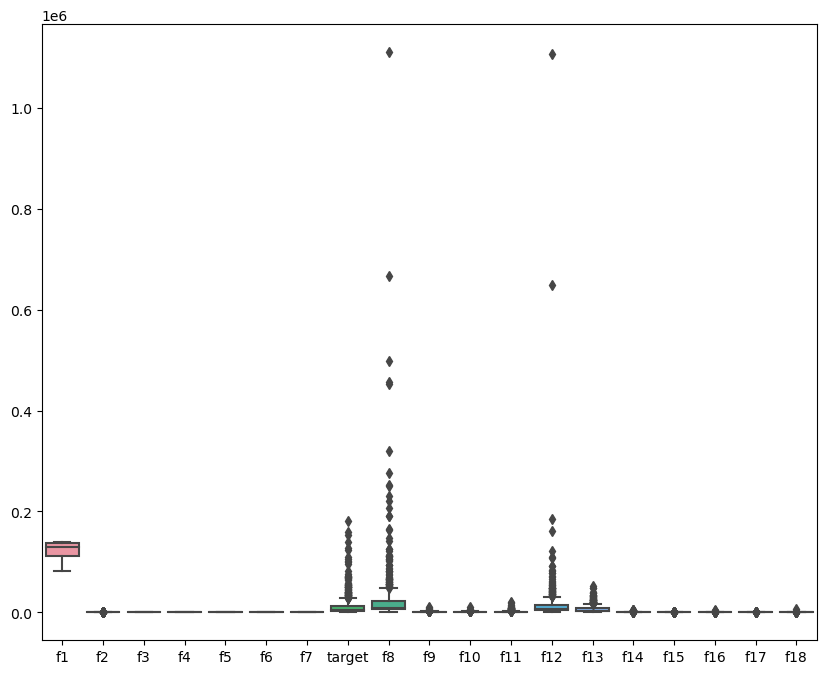

In [14]:
fig , ax = plt.subplots(figsize = (10,8))
sns.boxplot(data.rename(columns=columns_name))

Имеются значительные выбросы и аномальные данные в большой количестве у разных признаков. Также можно сделать вывод о неоднородности данных.

График QQ-plot также показывает наличие выбросов и отсутствие нормального распределения для ряда признаков.

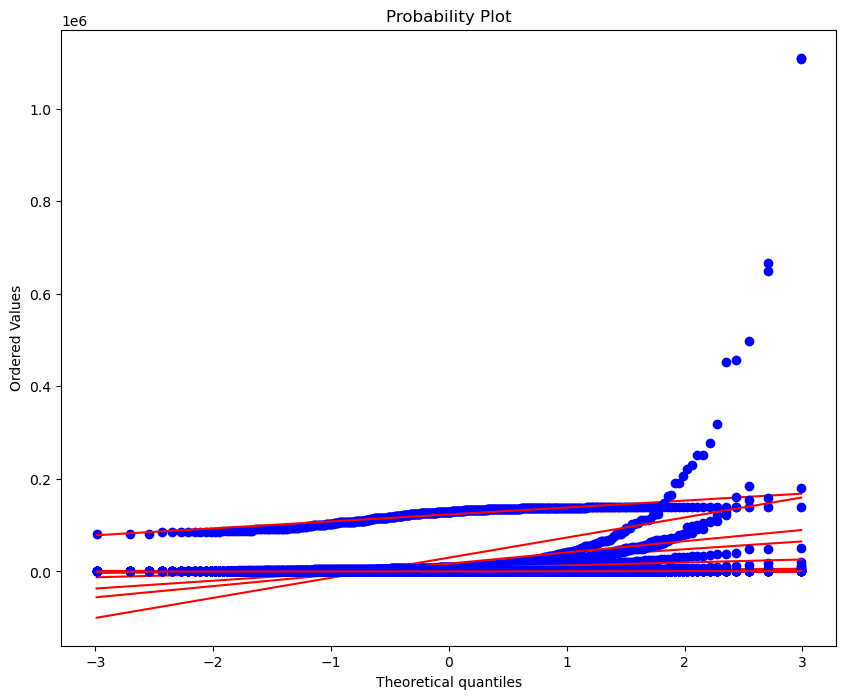

In [15]:
fig , ax = plt.subplots(figsize = (10,8))
for col in range(data.shape[1]):
    stats.probplot(data.values[:, col] ,plot=ax, fit=True)

Разделение выборки данных на матрицу признаков и целевые значения:

In [16]:
X = data.loc[:, data.columns != data.columns[7]]
y = data.loc[:, data.columns[7]]

Разделение на тестовые выборки и обучающие в отношении 70% обучающих к 30% тестовым:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
16,138414,1,3,12,3,3,0.0,2981,163,123,148,1868,1050,123,2,40.0,12.0,54
461,92400,1,1,2,1,4,0.0,10115,1291,1264,1878,8536,4884,706,5,79.0,11.0,95
357,116091,1,2,5,1,3,0.0,10441,689,544,833,7055,4046,487,2,267.0,40.0,309


In [19]:
y_train

16      1722
461     5880
357     5976
3      50128
215    28880
       ...  
106     3674
274     3706
352    23832
439     4898
102     1711
Name: target, Length: 346, dtype: int64

### Линейная регрессия

OLS (Ordinary Least Squares) или метод наименьших квадратов  — это метод подбора коэффициентов в линейной регрессии. Он заключается в минимизации суммы квадратов разностей между наблюдаемыми значениями и прогнозируемыми значениями

In [20]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [21]:
results = model.fit()
results.params

const   -14127.412692
f1           0.148207
f2         123.413975
f3        -662.404478
f4        -551.436861
f5         -21.312054
f6          29.542136
f7        -249.642566
f8           0.339659
f9          25.847854
f10        -15.668818
f11         -0.246859
f12         -0.360075
f13          1.546415
f14        -13.416797
f15         -1.403911
f16         -4.499485
f17         -1.007075
f18         -6.910471
dtype: float64

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     519.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.96e-225
Time:                        14:38:08   Log-Likelihood:                -3393.3
No. Observations:                 346   AIC:                             6823.
Df Residuals:                     328   BIC:                             6892.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.413e+04   4621.628     -3.057      0.002   -2.32e+04   -5035.641
f1             0.1482      0.049      3.006      0.003       0.051       0.245
f2           123.4140    750.140      0.165      0.869   -1352.279    1599.106
f3          -662.4045    337.701     -1.962      0.051   -1326.738       1.929
f4          -551.4369    237.954     -2.317      0.021   -1019.546     -83.327
f5           -21.3121    121.170     -0.176      0.860    -259.680     217.056
f6            29.5421     59.155      0.499      0.618     -86.830     145.914
f7          -249.6426    535.626     -0.466      0.641   -1303.339     804.054
f8             0.3397      0.007     45.656      0.000       0.325       0.354
f9            25.8479      7.427      3.480      0.001      11.237      40.459
f10          -15.6688      7.197     -2.177      0.030     -29.827      -1.510
f11           -0.2469      0.216     -1.145      0.253      -0.671       0.177
f12           -0.3601      0.009    -42.238      0.000      -0.377      -0.343
f13            1.5464      0.066     23.563      0.000       1.417       1.676
f14          -13.4168      1.625     -8.258      0.000     -16.613     -10.221
f15           -1.4039     20.524     -0.068      0.946     -41.779      38.972
f16           -4.4995     10.034     -0.448      0.654     -24.239      15.240
f17           -1.0071     17.442     -0.058      0.954     -35.319      33.305
f18           -6.9105      5.207     -1.327      0.185     -17.155       3.334
==============================================================================
Omnibus:                      130.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2501.769
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                      16.003   Cond. No.                     1.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1. Коэффициенты регрессии модели $Y = b_{0} + b_{1} \cdot d_{1} + b_{2} \cdot d_{2} + ... + b_{18} \cdot d_{18} + b_{19} \cdot d_{19}$:



- $b_{0}$ = -1.413e+04

- $b_{1}$ = 0.1482	
- $b_{2}$ = 123.4140
- $b_{3}$ = -662.4045
- $b_{4}$ = -551.4369
- $b_{5}$ = -21.3121
- $b_{6}$ = 29.5421
- $b_{7}$ = -249.6426
- $b_{8}$ = 0.3397
- $b_{9}$ = 25.8479
- $b_{10}$ = -15.6688
- $b_{11}$ = -0.2469
- $b_{12}$ = -0.3601
- $b_{13}$ = 1.5464
- $b_{14}$ = -13.4168
- $b_{15}$ = -1.4039
- $b_{16}$ = -4.4995
- $b_{17}$ = -1.0071
- $b_{18}$ = -6.9105


2. Коэффициент детерминации R-squared = 0.964, его скорректированная оценка Adj. R-squared = 0.962 - это означает, что регрессионная модель объясняет 96% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 1.816e+29

>расчетный уровень значимости Prob (F-statistic) = 0.00

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 не принимается, т.е. коэффициент детерминации значимый

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости $P>|t|$ для $b_{0}, b_{1}, b_{4}, b_{8}, b_{9}, b_{10}, b_{12}, b_{13}, b_{14}$ не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для данных коэффициентов регрессии $([0.025; 0.975])$ не включает в себя точку 0

>расчетный уровень значимости $P>|t|$ для $b_{2}, b_{3}, b_{5}, b_{6}, b_{7}, b_{11}, b_{15},b_{16}, b_{17}, b_{18}$ превышает 0.05. 
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t-критерия для коэффициентов очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 
Также в уточнении указано, что наименьшее собственное значение равное 3.66e-24, говорящее о возможном наличии мультиколлинеарности или сингулярности.

In [23]:
X_test = sm.add_constant(X_test)

In [24]:
y_pred = results.predict(X_test)
y_pred

460    56331.375367
73     16096.873794
314    38599.689952
179     3564.435332
337     2991.564213
           ...     
406     2903.391715
197     2949.621144
5      10532.473196
117      741.603898
45      6429.850807
Length: 149, dtype: float64

In [25]:
residual = y_test - y_pred
residual

460     -811.375367
73     -4652.873794
314    14136.310048
179       17.564668
337     -179.564213
           ...     
406     1866.608285
197    -1029.621144
5        -60.473196
117      -12.603898
45      1538.149193
Length: 149, dtype: float64

# Исследование линейной взаимосвязи
Первый шаг для проверки применимости линейной регрессии заключается в исследовании линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

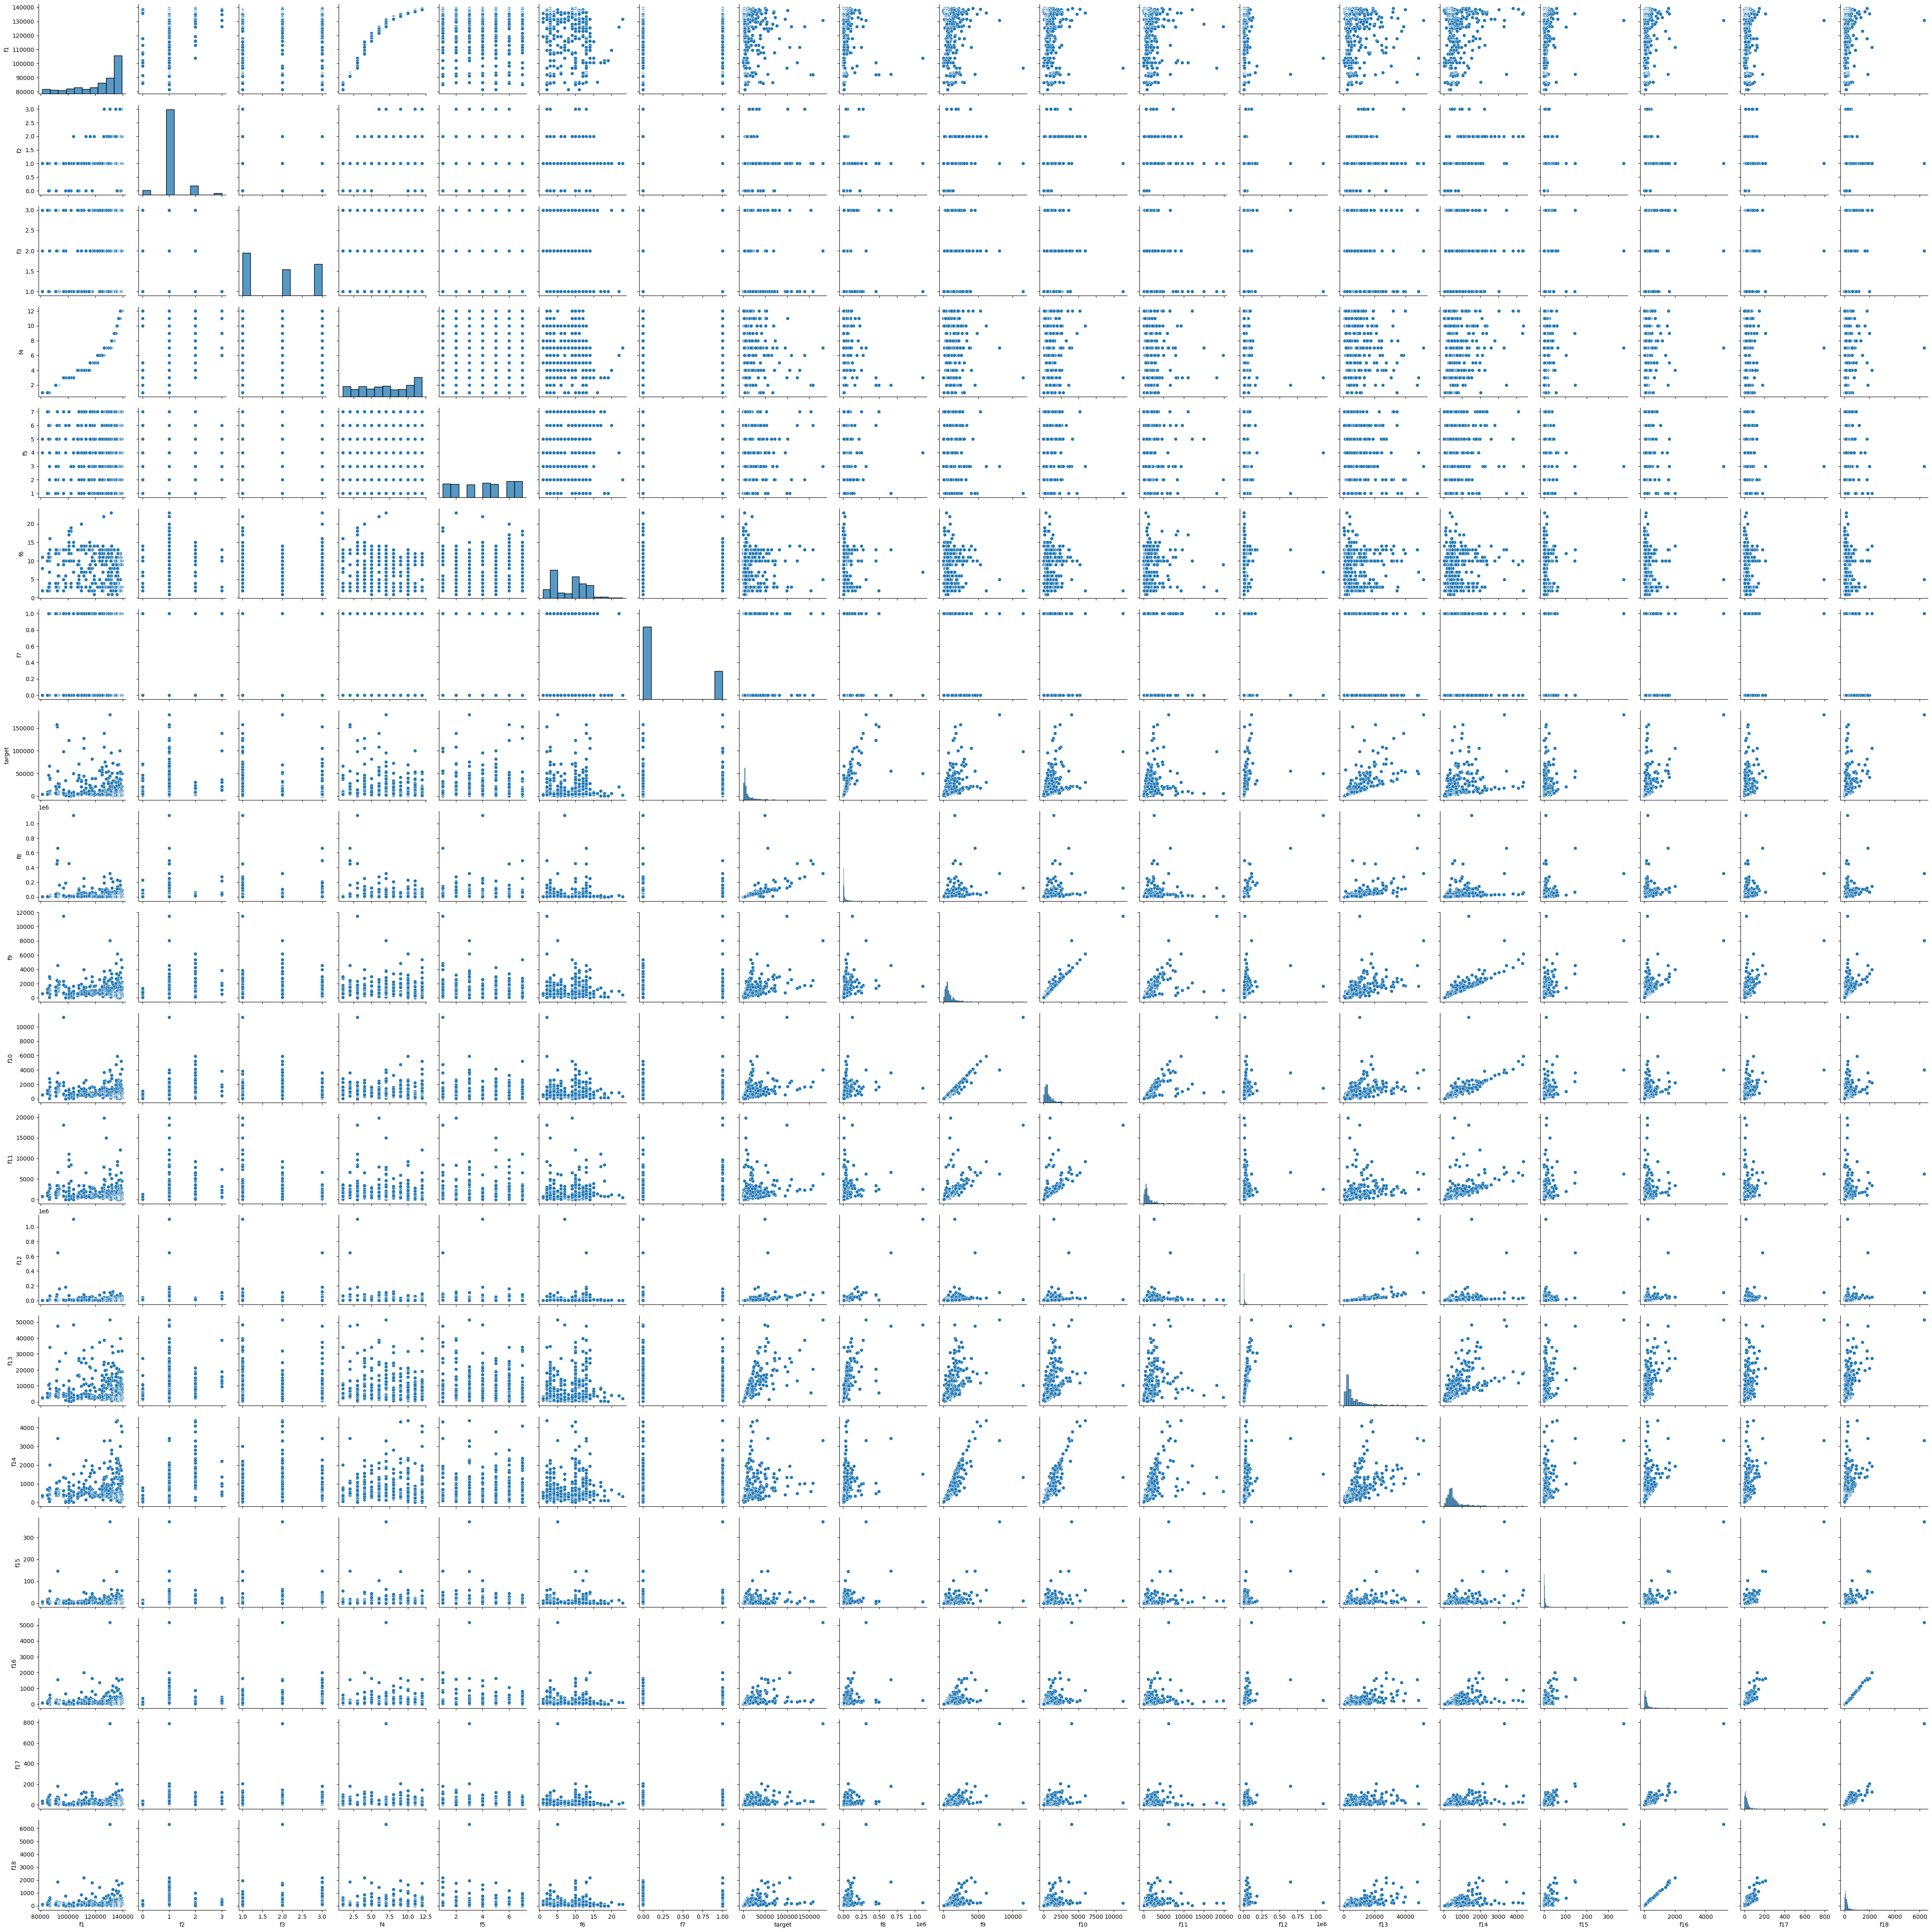

In [26]:
sns.pairplot(data)

# Условие независимости предикторов (отсутсвие мультиколлинеарности)

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами).

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Чтобы избежать этого необходимо отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данное условие, необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

In [26]:
correlation = data.corr()
correlation

,f1,f2,f3,f4,f5,f6,f7,target,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
f1,1.000000,0.214502,-0.084925,0.940892,-0.012685,-0.150466,0.009406,-0.082650,-0.102703,-0.110379,-0.148021,-0.127574,-0.096492,-0.059286,0.036287,0.032668,0.054906,-0.004801,0.047952
f2,0.214502,1.000000,0.055925,0.194172,0.020916,0.033926,0.016768,0.077681,0.048039,0.350386,0.390176,0.240724,0.044670,0.182267,0.486135,0.050949,0.042609,0.093485,0.049504
f3,-0.084925,0.055925,1.000000,-0.121637,-0.045016,-0.106965,-0.027818,-0.147589,-0.097811,-0.002569,-0.036968,-0.155123,-0.050116,-0.111395,0.015816,0.025116,0.124101,0.149209,0.123557
f4,0.940892,0.194172,-0.121637,1.000000,0.009694,-0.181316,-0.014887,-0.101060,-0.100952,-0.113358,-0.144896,-0.141257,-0.094327,-0.089883,0.014094,0.007262,0.027346,-0.021869,0.021204
f5,-0.012685,0.020916,-0.045016,0.009694,1.000000,0.045980,0.003250,-0.045699,-0.030826,-0.042740,-0.024228,-0.016853,-0.044550,-0.062904,0.007021,-0.074726,-0.079296,-0.048711,-0.077008
f6,-0.150466,0.033926,-0.106965,-0.181316,0.045980,1.000000,-0.069143,0.003009,0.012525,0.003748,0.012175,0.078787,0.038759,0.052158,0.037801,0.000563,-0.024721,-0.058695,-0.027541
f7,0.009406,0.016768,-0.027818,-0.014887,0.003250,-0.069143,1.000000,0.144170,0.060860,0.113796,0.094603,0.094808,0.001925,0.106648,0.050740,0.074137,0.108940,0.076821,0.105313
target,-0.082650,0.077681,-0.147589,-0.101060,-0.045699,0.003009,0.144170,1.000000,0.694469,0.569135,0.476183,0.322345,0.321466,0.742141,0.398580,0.426126,0.544262,0.456413,0.537364
f8,-0.102703,0.048039,-0.097811,-0.100952,-0.030826,0.012525,0.060860,0.694469,1.000000,0.367281,0.313849,0.224643,0.850700,0.651500,0.322420,0.315759,0.344250,0.286864,0.342260
f9,-0.110379,0.350386,-0.002569,-0.113358,-0.042740,0.003748,0.113796,0.569135,0.367281,1.000000,0.968088,0.675695,0.259366,0.610261,0.838541,0.504954,0.568608,0.531346,0.570826


<AxesSubplot: >

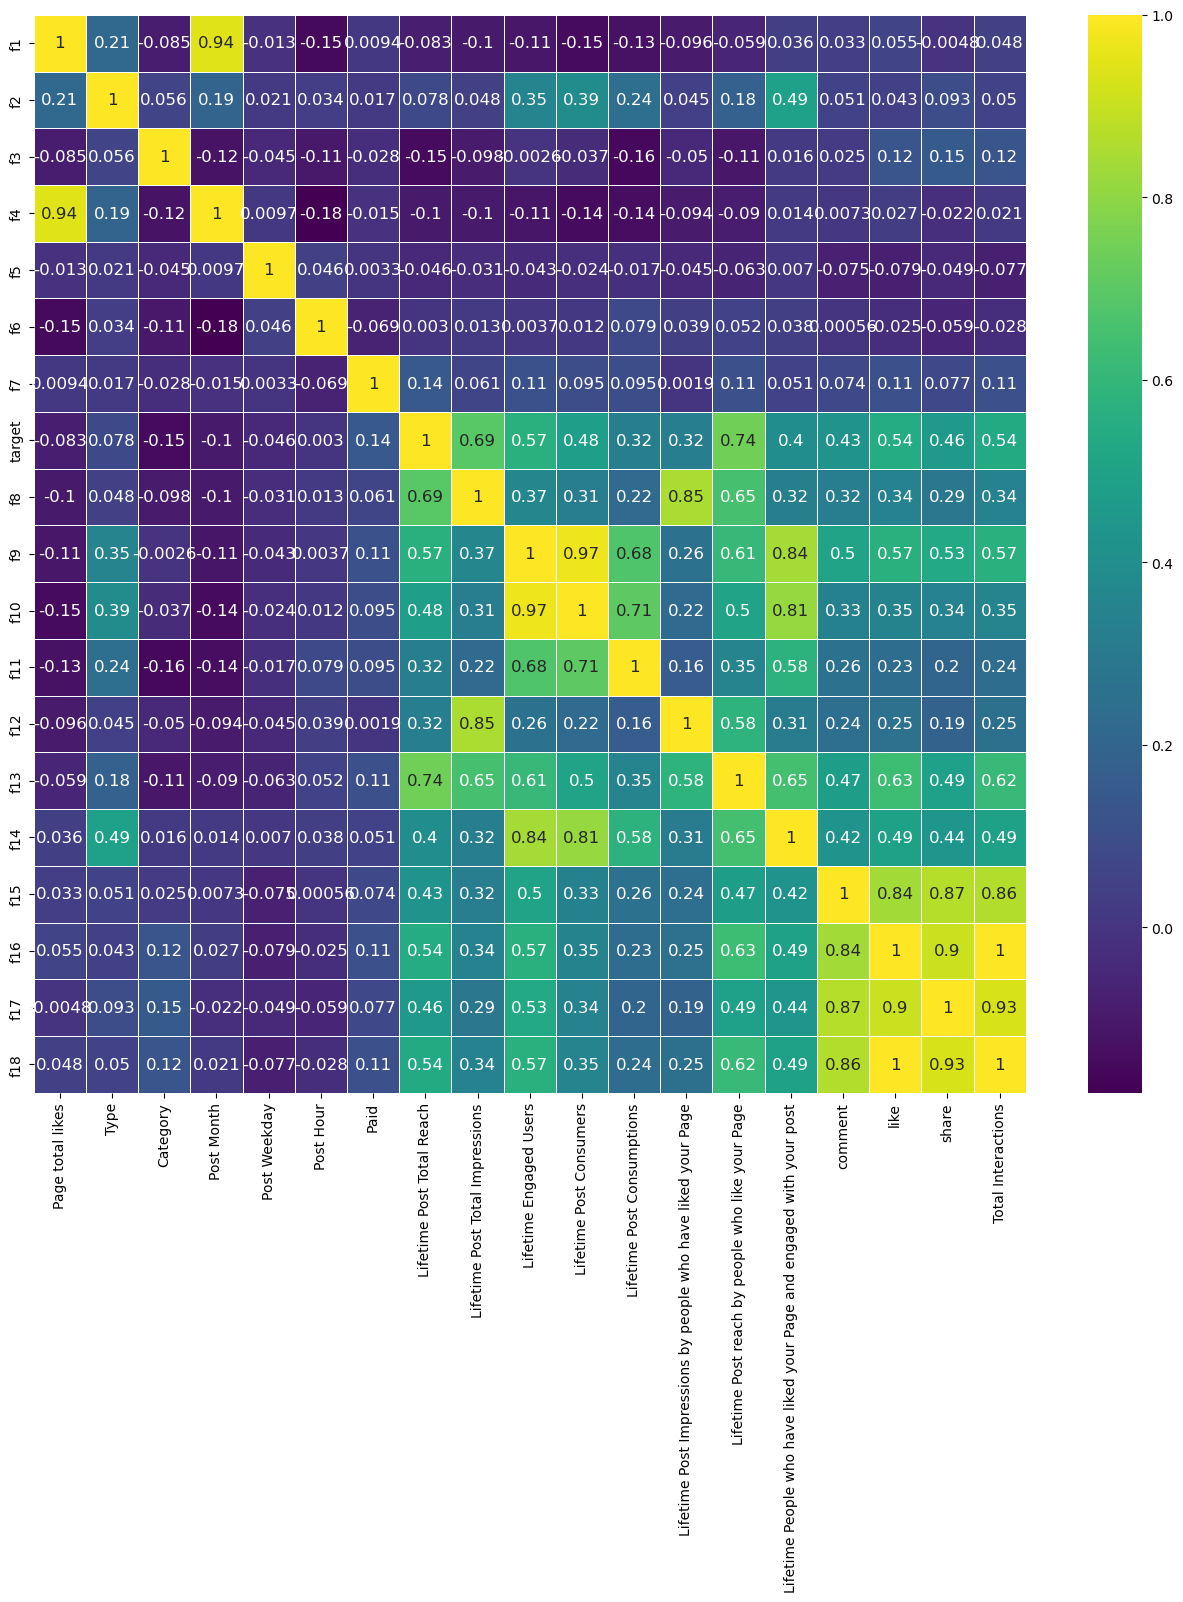

In [27]:
fig , ax = plt.subplots(figsize = (16,14))

correlation.columns = columns_name

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

VIF (variance inflation factor), фактор инфляции дисперсии - это мера мультиколлинеарности. Он позволяет оценить увеличение дисперсии заданного коэффициента регрессии, происходящее из-за высокой корреляции данных.

In [28]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
vif,58.229938,13.065941,8.088414,20.112659,5.121931,4.90226,1.506192,6.515644,1614.339223,1143.103318,3.933176,4.993095,7.970934,35.215786,inf,inf,inf,inf


Признаки 1,9,10,15,16,17,18 имеют сильную зависимость, что может свидетельствовать о мультиколиннеарности.

# Нормальное распределение остатков
После того построения модели регрессии, можно вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

<AxesSubplot: ylabel='Density'>

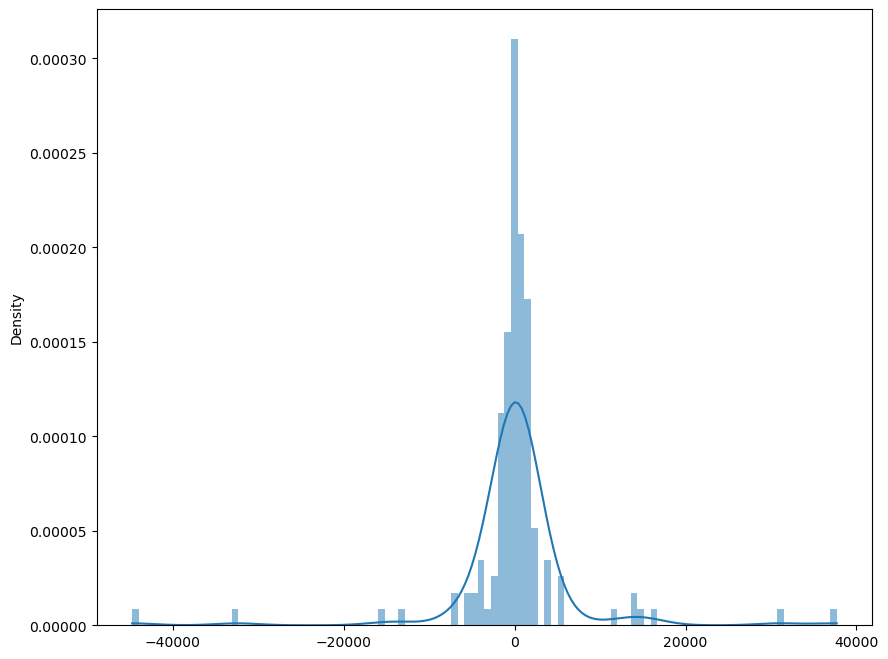

In [29]:
fig , ax = plt.subplots(figsize = (10,8))
sns.histplot(residual, kde=True, stat="density", linewidth=0)

График QQ-plot:

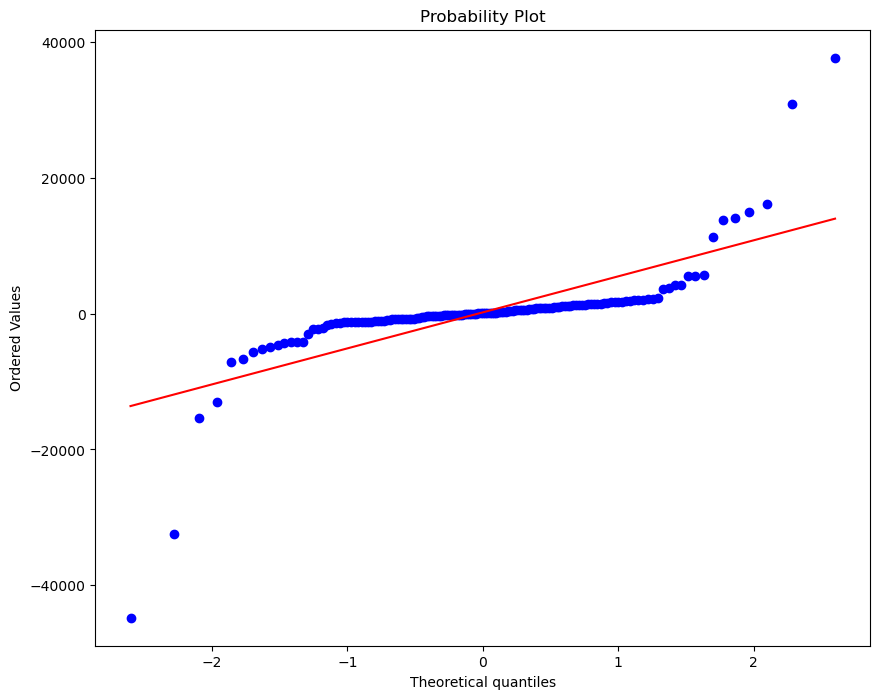

In [30]:
fig , ax = plt.subplots(figsize = (10,8))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

Анализируя данные два графика, можно сделать вывод, что имеются аномальные выбросы.

In [31]:
np.mean(residual)

190.88837368057438

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый.

Пример: предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация не является удовлетворяющей. Необходимо, чтобы качество модели было одно и то же при любых значениях независимой переменной.

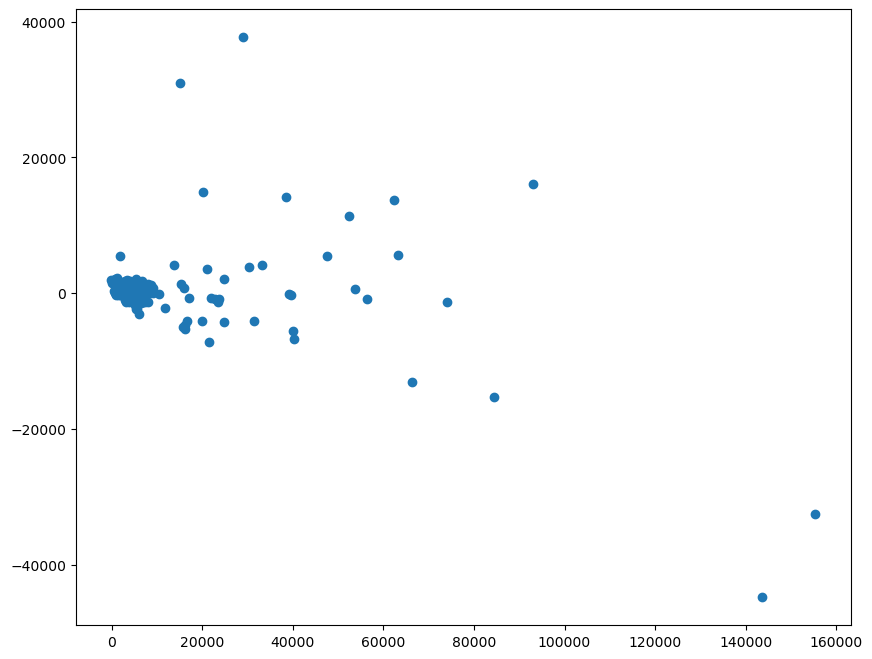

In [32]:
fig , ax = plt.subplots(figsize = (10,8))
_ = ax.scatter(y_pred, residual)

Тест Голдфелда-Куандта - процедура тестирования гетероскедастичности случайных ошибок регрессионной модели, применяемая в случае, когда есть основания полагать, что стандартное отклонение ошибок может быть пропорционально некоторой переменной. Тест также основывается на предположении нормальности распределения случайных ошибок регрессионной модели. Фактически это F-тест, поскольку статистика теста имеет распределение Фишера.

In [33]:
model_fit = results
p_level = 0.95
model_name='linear_ols'
a_level = 1 - p_level
    
test = statsmodels.stats.diagnostic.het_goldfeldquandt(model_fit.resid, model_fit.model.exog)
test_result = lzip(['F_statistic', 'p_calc'], test)
    
F_calc_tuple = test_result[0]
F_statistic = F_calc_tuple[1]

p_calc_tuple = test_result[1]
p_calc = p_calc_tuple[1]
    
conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    
result = pd.DataFrame({
        'test': ('Goldfeld–Quandt test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)},
        index=[model_name])
result

,test,p_level,a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Goldfeld–Quandt test,0.95,0.05,1.198293,0.130612,False,not heteroscedasticity


Можно сделать вывод, что отсутствует гетероскедастичность.

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

C:\Users\Администратор\AppData\Local\Temp\ipykernel_12280\1759897647.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


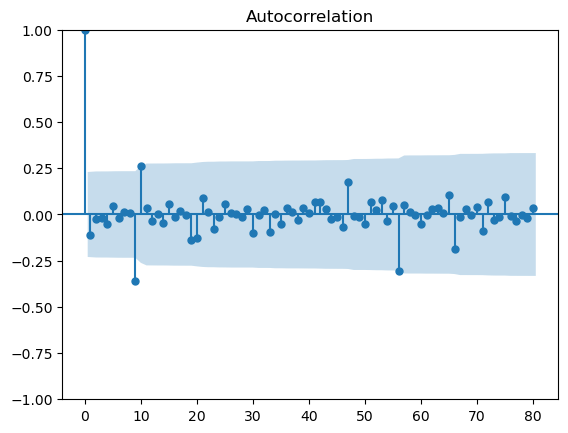

In [34]:
acf = smt.graphics.plot_acf(residual, lags=80 , alpha=0.005)
acf.show()

Так как в ходе анализа и построение регрессионной модели были выявлены аномальные выбросы и признаки слабовлияющие на модель линейной регрессии, следует провести повторный анализ с использованием только значимыз признаков, полученных в ходе анализа.

# Регрессионный анализ значимых признаков

Повторно изучим полученный график корреляции признаков и уровень p-value для отбора качественных признаков.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     519.5
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.96e-225
Time:                        14:38:16   Log-Likelihood:                -3393.3
No. Observations:                 346   AIC:                             6823.
Df Residuals:                     328   BIC:                             6892.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.413e+04   4621.628     -3.057      0.002   -2.32e+04   -5035.641
f1             0.1482      0.049      3.006      0.003       0.051       0.245
f2           123.4140    750.140      0.165      0.869   -1352.279    1599.106
f3          -662.4045    337.701     -1.962      0.051   -1326.738       1.929
f4          -551.4369    237.954     -2.317      0.021   -1019.546     -83.327
f5           -21.3121    121.170     -0.176      0.860    -259.680     217.056
f6            29.5421     59.155      0.499      0.618     -86.830     145.914
f7          -249.6426    535.626     -0.466      0.641   -1303.339     804.054
f8             0.3397      0.007     45.656      0.000       0.325       0.354
f9            25.8479      7.427      3.480      0.001      11.237      40.459
f10          -15.6688      7.197     -2.177      0.030     -29.827      -1.510
f11           -0.2469      0.216     -1.145      0.253      -0.671       0.177
f12           -0.3601      0.009    -42.238      0.000      -0.377      -0.343
f13            1.5464      0.066     23.563      0.000       1.417       1.676
f14          -13.4168      1.625     -8.258      0.000     -16.613     -10.221
f15           -1.4039     20.524     -0.068      0.946     -41.779      38.972
f16           -4.4995     10.034     -0.448      0.654     -24.239      15.240
f17           -1.0071     17.442     -0.058      0.954     -35.319      33.305
f18           -6.9105      5.207     -1.327      0.185     -17.155       3.334
==============================================================================
Omnibus:                      130.746   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2501.769
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                      16.003   Cond. No.                     1.30e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.66e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18
vif,58.229938,13.065941,8.088414,20.112659,5.121931,4.90226,1.506192,6.515644,1614.339223,1143.103318,3.933176,4.993095,7.970934,35.215786,inf,inf,inf,inf


По уровню значимости p-value можно заключить, что коэффициенты $b_0, b_1, b_4, b_8, b_9, b_{10}, b_{12}, b_{13}$ и $b_{14}$ являются значимыми.  
По уровню корреляции менее коллинеарными являются $b_2, b_3, b_4, b_5, b_6, b_7, b_8, b_{11}, b_{12}, b_{13}, b_{14}$.

In [37]:
new_data = data.drop(data.columns[[0, 1, 3, 4, 2, 5, 6, 9, 10, 11, 15, 16, 17, 18]], axis = 1)
new_data

,target,f8,f12,f13,f14
0,2752,5091,3078,1640,119
1,10460,19057,11710,6112,1108
2,2413,4373,2812,1503,132
3,50128,87991,61027,32048,1386
4,7244,13594,6228,3200,396
...,...,...,...,...,...
494,5400,9218,5654,3230,422
495,4684,7536,4750,2876,392
496,3480,6229,3961,2104,301
497,3778,7216,4742,2388,363


In [38]:
new_data.describe()

,target,f8,f12,f13,f14
count,495.000000,4.950000e+02,4.950000e+02,495.000000,495.000000
mean,14028.101010,2.985698e+04,1.691628e+04,6641.355556,614.135354
std,22821.050008,7.714291e+04,6.007402e+04,7700.266455,614.346297
min,238.000000,5.700000e+02,5.670000e+02,236.000000,9.000000
25%,3331.000000,5.798000e+03,4.073500e+03,2213.000000,297.500000
50%,5290.000000,9.084000e+03,6.282000e+03,3478.000000,416.000000
75%,13248.000000,2.250300e+04,1.514300e+04,8018.000000,658.500000
max,180480.000000,1.110282e+06,1.107833e+06,51456.000000,4376.000000


В конечном счете получили 5 колонок, где 4 являются признаками, а первая - целевой переменной.
Так как проверка на наличие дубликатов и пропусков была проделана с этими же данными выше, можно приступить к анализу.

<AxesSubplot: >

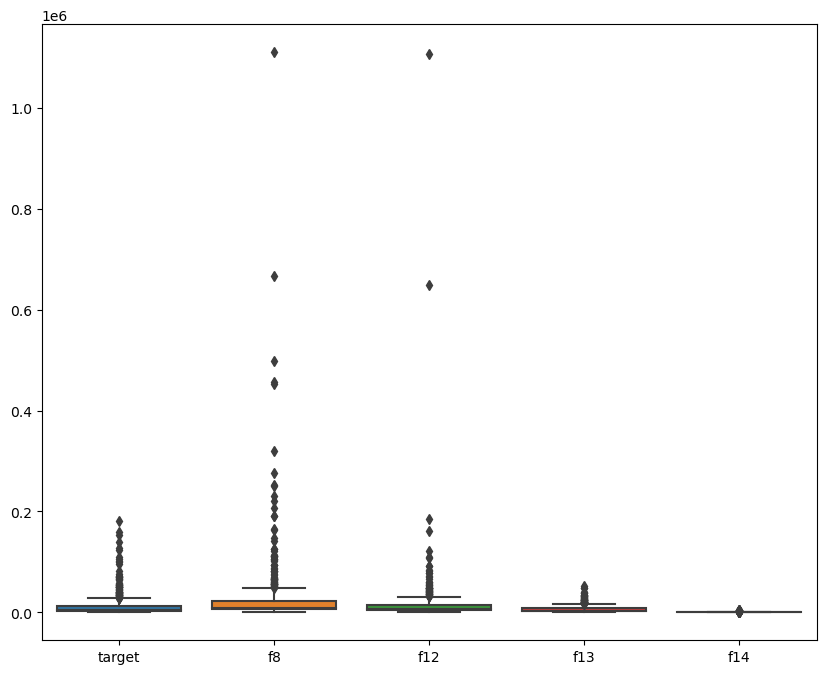

In [39]:
fig , ax = plt.subplots(figsize = (10,8))
sns.boxplot(new_data)

Проведем обработку выбросов с помощью квантильной функции:

In [40]:
col = 'f8'
q1 = new_data[col].quantile(0.25)
q3 = new_data[col].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
new_data.drop(new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)].index, inplace=True)

In [41]:
col = 'target'
q1 = new_data[col].quantile(0.25)
q3 = new_data[col].quantile(0.85)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
new_data.drop(new_data[(new_data[col] < lower_bound) | (new_data[col] > upper_bound)].index, inplace=True)

<AxesSubplot: >

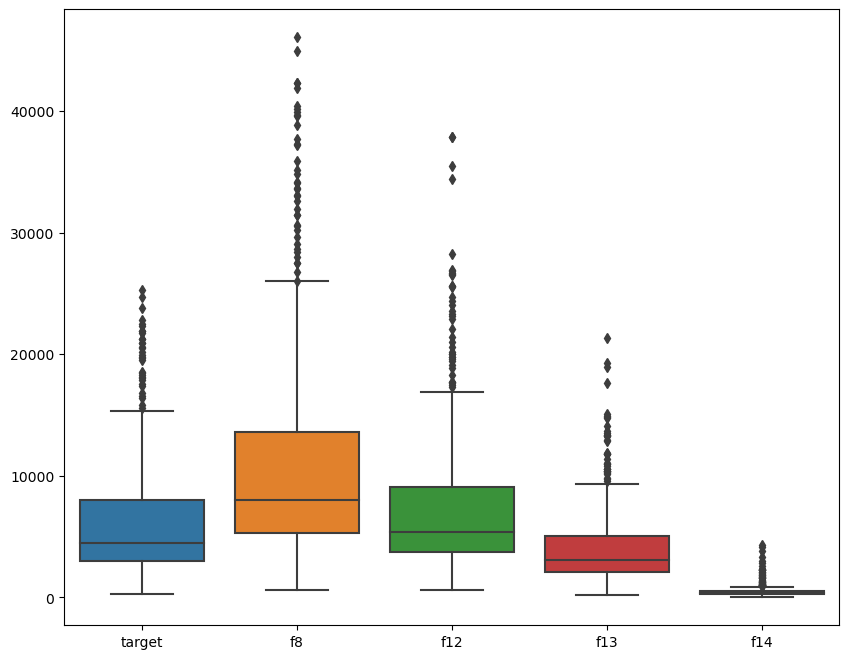

In [42]:
fig , ax = plt.subplots(figsize = (10,8))
sns.boxplot(new_data)

Построим график QQ-plot:

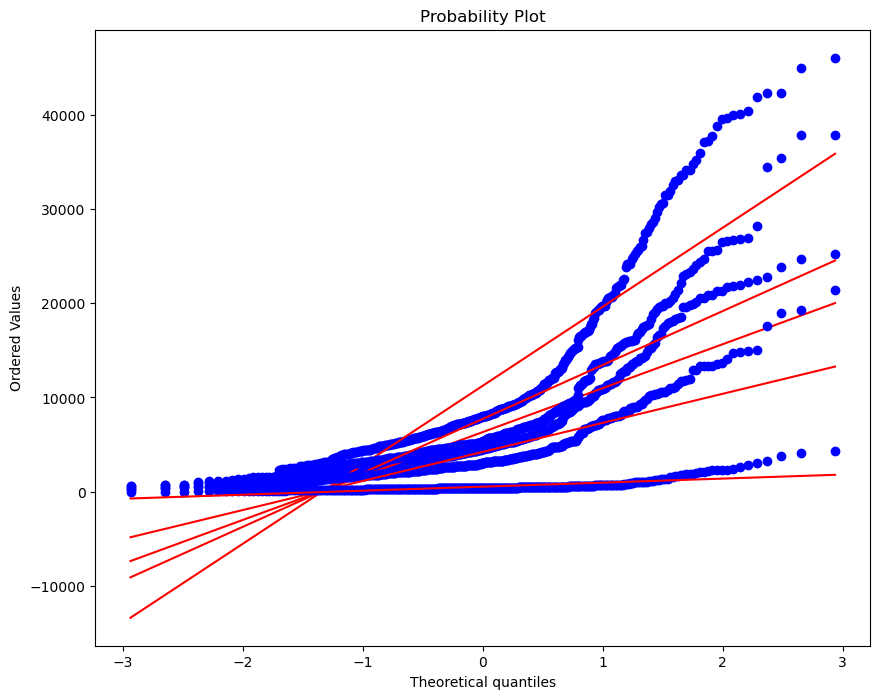

In [43]:
fig , ax = plt.subplots(figsize = (10,8))
for col in range(new_data.shape[1]):
    stats.probplot(new_data.values[:, col] ,plot=ax, fit=True)

Разделение выборки данных на матрицу признаков и целевые значения:

In [44]:
X = new_data.loc[:, new_data.columns != new_data.columns[0]]
y = new_data.loc[:, new_data.columns[0]]

Разделение на тестовые выборки и обучающие в отношении 70% обучающих к 30% тестовым:

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [46]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,f8,f12,f13,f14
88,2838,1210,690,143
154,10282,5696,3162,537
316,5113,3476,2174,347


### Повторное построение линейной регрессии

In [47]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [48]:
results = model.fit()
results.params

const   -18.095929
f8        0.614402
f12      -0.875678
f13       1.500992
f14      -0.169021
dtype: float64

In [49]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3984.
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          2.30e-249
Time:                        14:38:21   Log-Likelihood:                -2311.6
No. Observations:                 291   AIC:                             4633.
Df Residuals:                     286   BIC:                             4652.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0959     65.950     -0.274      0.784    -147.904     111.712
f8             0.6144      0.010     60.029      0.000       0.594       0.635
f12           -0.8757      0.035    -24.842      0.000      -0.945      -0.806
f13            1.5010      0.062     24.248      0.000       1.379       1.623
f14           -0.1690      0.104     -1.626      0.105      -0.374       0.036
==============================================================================
Omnibus:                      146.616   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16283.610
Skew:                          -0.984   Prob(JB):                         0.00
Kurtosis:                      39.594   Cond. No.                     2.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Коэффициенты регрессии модели 

 $Y = b_{0} + b_{1} \cdot d_{1} + b_{2} \cdot d_{2} + b_{3} \cdot d_{3} + b_{4} \cdot d_{4}$ :



- $b_{0}$ = -18.0959

- $b_{1}$ = 0.6144
- $b_{2}$ = -0.8757
- $b_{3}$ = 1.5010
- $b_{4}$ = -0.1690	


* Коэффициент детерминации R-squared = 0.982, его скорректированная оценка Adj. R-squared = 0.982 - это означает, что регрессионная модель объясняет 98% вариации переменной Y.


* Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 3984

>расчетный уровень значимости Prob (F-statistic) = 2.30e-249

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 не принимается, т.е. коэффициент детерминации значимый

* Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости $P>|t|$ для $b_{1}, b_{2}, b_{3}$ не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для данных коэффициентов регрессии $([0.025; 0.975])$ не включает в себя точку 0

In [50]:
X_test = sm.add_constant(X_test)

In [51]:
X_test.head(10)

,const,f8,f12,f13,f14
177,1.0,10830,6866,4016,495
475,1.0,9238,6101,3546,420
493,1.0,13960,8632,5348,699
109,1.0,27468,20198,10432,2252
82,1.0,9193,3691,1722,305
497,1.0,7216,4742,2388,363
465,1.0,10832,7316,4280,583
259,1.0,8360,5010,2818,459
42,1.0,13989,13544,7096,1975
58,1.0,4372,3188,1557,168


In [52]:
y_pred = results.predict(X_test)
np.round(y_pred.values[:10])

array([ 6568.,  5567.,  8909., 14449.,  4931.,  3786.,  6556.,  4883.,
        7034.,  2185.])

In [53]:
residual = y_test - y_pred
residual

177   -359.796609
475    187.228156
493   -497.270197
109   -577.081349
82    -349.135334
          ...    
466    -16.438560
137    158.227551
407     44.604849
133     94.226512
286    -44.772232
Length: 126, dtype: float64

### Повторное исследование линейной взаимосвязи

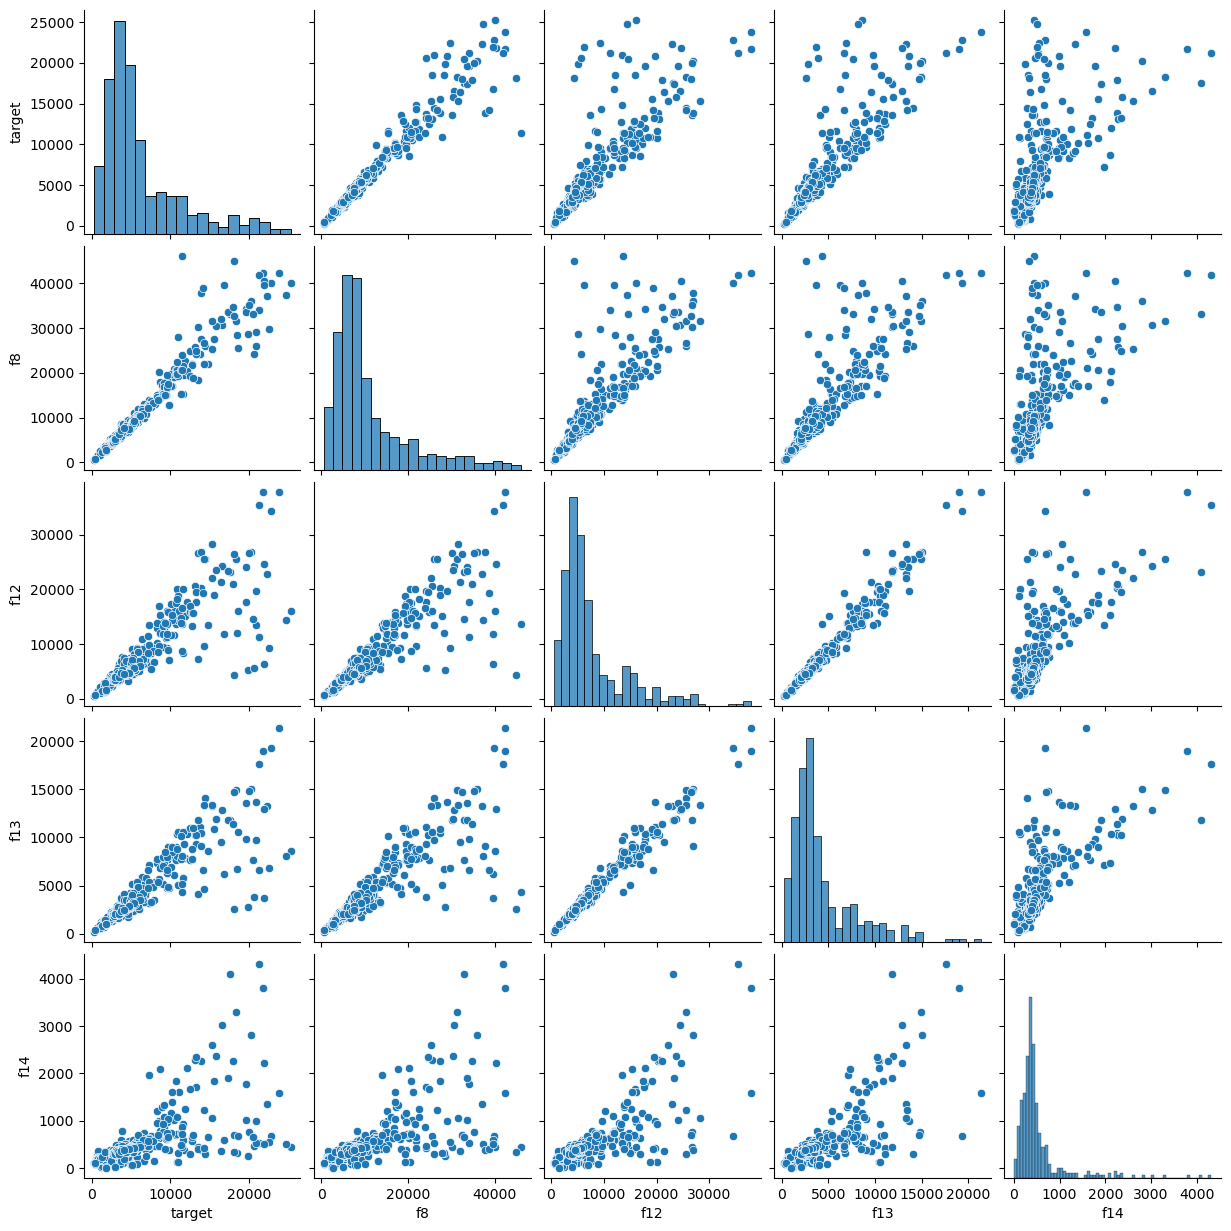

In [54]:
sns.pairplot(new_data)

### Повторная проверка условие независимости предикторов (отсутствие мультиколлинеарности)


In [55]:
cols_num = ['f8', 'f12', 'f13', 'f14']

new_correlation = new_data.corr().loc[cols_num, cols_num]
new_correlation

,f8,f12,f13,f14
f8,1.000000,0.880816,0.860160,0.638606
f12,0.880816,1.000000,0.982702,0.738940
f13,0.860160,0.982702,1.000000,0.732508
f14,0.638606,0.738940,0.732508,1.000000


<AxesSubplot: >

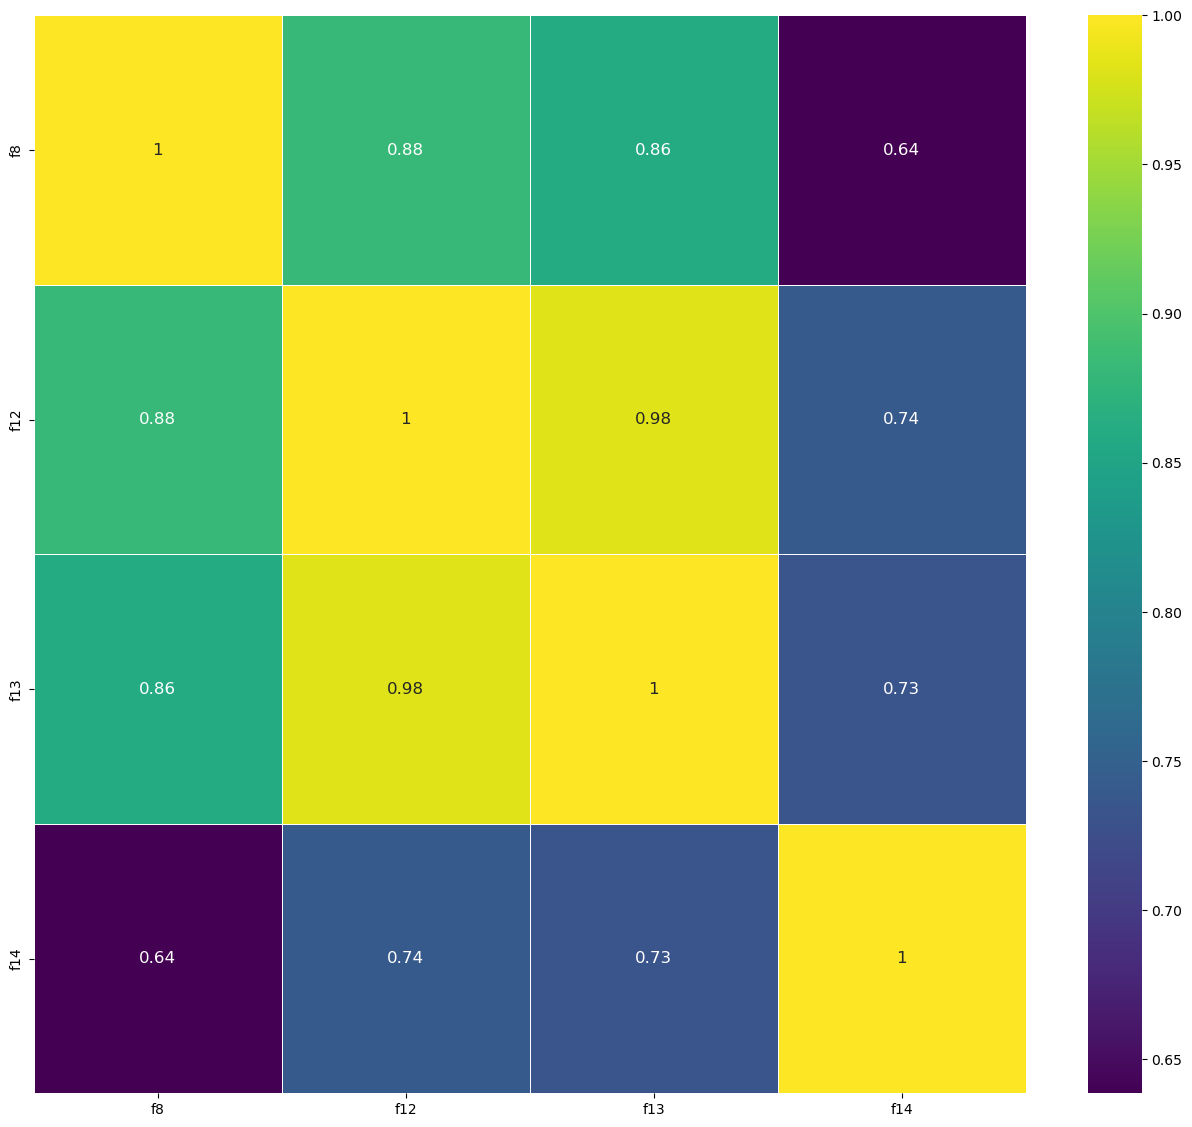

In [56]:
fig , ax = plt.subplots(figsize = (16,14))
sns.heatmap(new_correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [57]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,f8,f12,f13,f14
vif,12.663752,76.989772,69.032142,3.755656


### Проверка нормального распределение остатков для полученной модели

<AxesSubplot: ylabel='Density'>

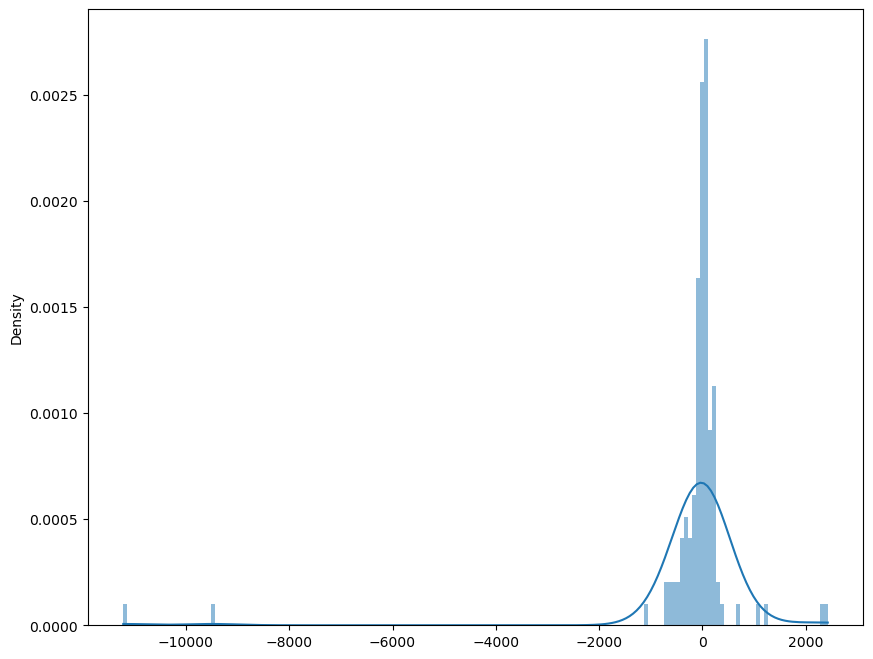

In [58]:
fig , ax = plt.subplots(figsize = (10,8))
sns.histplot(residual, kde=True, stat="density", linewidth=0)

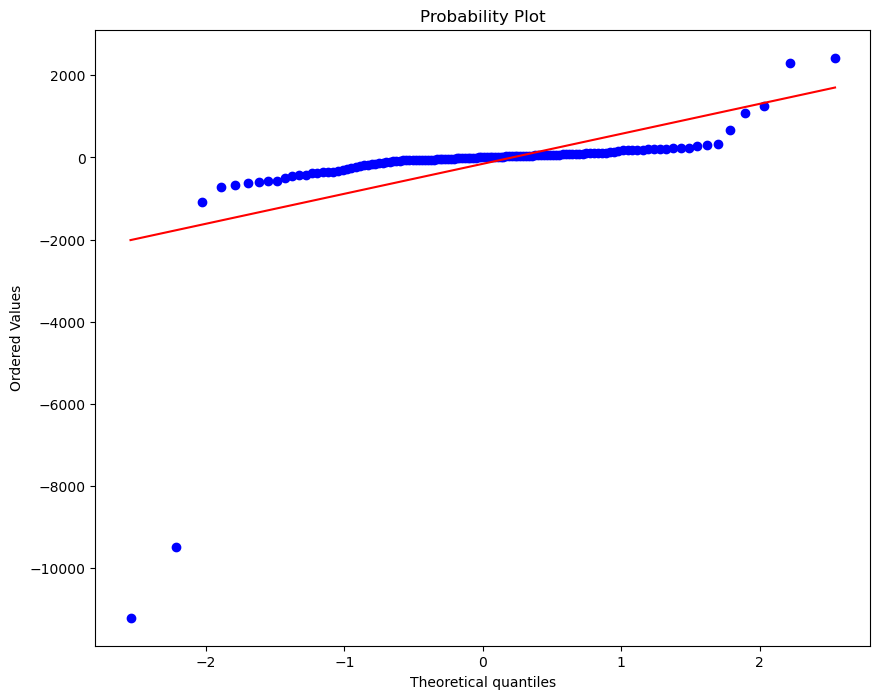

In [59]:
fig , ax = plt.subplots(figsize = (10,8))
_, (__, ___, r) = stats.probplot(residual, plot=ax, fit=True)

In [60]:
np.mean(residual)

-154.6430590614872

### Гомоскедастичность для новой регрессии

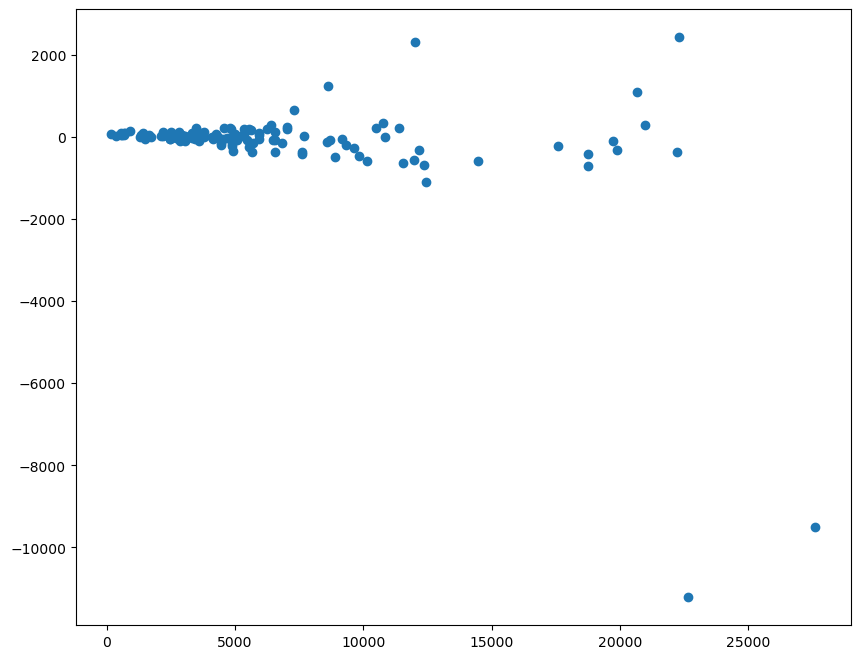

In [61]:
fig , ax = plt.subplots(figsize = (10,8))
_ = ax.scatter(y_pred, residual)

In [62]:
model_fit = results
p_level = 0.95
model_name='linear_ols'
a_level = 1 - p_level
    
test = statsmodels.stats.diagnostic.het_goldfeldquandt(model_fit.resid, model_fit.model.exog)
test_result = lzip(['F_statistic', 'p_calc'], test)
    
F_calc_tuple = test_result[0]
F_statistic = F_calc_tuple[1]

p_calc_tuple = test_result[1]
p_calc = p_calc_tuple[1]
    
conclusion_test = 'heteroscedasticity' if p_calc < a_level else 'not heteroscedasticity'
    
result = pd.DataFrame({
        'test': ('Goldfeld–Quandt test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'F_statistic': (F_statistic),
        'p_calc': (p_calc),
        'p_calc < a_level': (p_calc < a_level),
        'heteroscedasticity_check': (conclusion_test)},
        index=[model_name])
result

,test,p_level,a_level,F_statistic,p_calc,p_calc < a_level,heteroscedasticity_check
linear_ols,Goldfeld–Quandt test,0.95,0.05,0.82258,0.875794,False,not heteroscedasticity


То есть новые данные не гетероскедаcтичные.

### Проверка отсутствия автокорреляции остатков для полученной регрессии

C:\Users\Администратор\AppData\Local\Temp\ipykernel_12280\3618548398.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


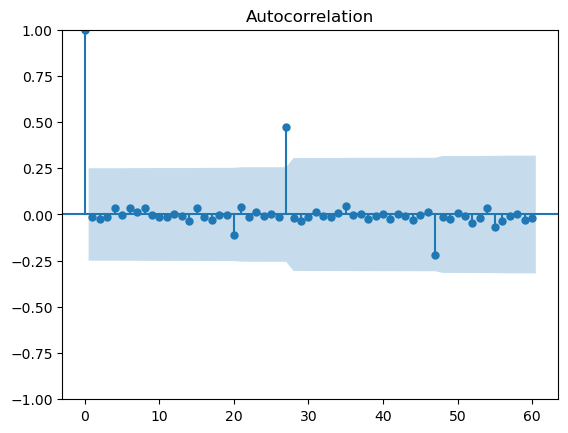

In [63]:
acf = smt.graphics.plot_acf(residual, lags=60 , alpha=0.005)
acf.show()

# Построение регрессионной модели матрицами 


### $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



Коэффициенты b матричным вычислением:

In [64]:
X = new_data.loc[:, new_data.columns != new_data.columns[0]]
y = new_data.loc[:, new_data.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)
X_train = sm.add_constant(X_train)

In [65]:
b = np.linalg.inv((X_train.T @ X_train)) @ X_train.T @ y_train
b

0   -18.095929
1     0.614402
2    -0.875678
3     1.500992
4    -0.169021
dtype: float64

Спрогнозированные значения:

$y = X \cdot \beta^{T}$

In [66]:
X_test = sm.add_constant(X_test)
y_pred = np.dot(X_test, b.T)
np.round(y_pred[:10])

array([ 6568.,  5567.,  8909., 14449.,  4931.,  3786.,  6556.,  4883.,
        7034.,  2185.])

Cредняя абсолютная ошибка (MSE):

In [67]:
mean_absolute_error(y_test, y_pred)

374.5851179722389

Коэффициент детерминации:

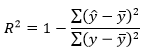

In [68]:
rss = np.sum(np.square(y_test - y_pred))
ess = np.sum(np.square(y_test - y_test.mean()))
r2 = 1 - (rss / ess)
r2

0.9280963766968031

Cкорректированный коэффициент детерминации:

In [69]:
n = y_test.shape[0]
p = b.shape[0]
dec = lambda x: x-1
r2s =  1 - (1 - r2) * (dec(n) / dec(n - p))
r2s

0.9251003923925032

## Нахождение коеффициентов градиентным спуском  

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [70]:
X = new_data.loc[:, new_data.columns != new_data.columns[0]]
y = new_data.loc[:, new_data.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

Нахождения градиента:

In [71]:
iterations=100000+1
learning_rate = 0.01
stopping_threshold = 1e-6
X_train = (X_train - X_train.min())/(X_train.max()-X_train.min())
current_weight = np.zeros(X_train.shape[1])
current_bias = 0.0
iterations = iterations
learning_rate = learning_rate
n = float(X_train.shape[0])
costs = []
weights = []
previous_cost = np.inf
     
for i in range(iterations):
         
    y_pred = (X_train @ current_weight) + current_bias
    current_cost = np.square(y_train - y_pred).mean()
    if abs(previous_cost-current_cost)<=stopping_threshold:
        print("\nI got along!\n")
        break
         
    previous_cost = current_cost
        
    costs.append(current_cost)
    weights.append(current_weight)
         
    weight_derivative = -(2/n) * np.dot(X_train.T, (y_train-y_pred))
    bias_derivative = -(2/n) * sum(y_train - y_pred)
         
    current_weight = current_weight - (learning_rate * weight_derivative)
    current_bias = current_bias - (learning_rate * bias_derivative)
        
    if i%20000 == 0: print(f'Epochs {i}:\t\nBias {current_bias}, Weight {current_weight}')
        
print(f'Weight: {current_weight}\nBias: {current_bias}')

Epochs 0:	
Bias 126.97079037800688, Weight [53.50759783 39.28756764 37.9373638  22.90612277]
Epochs 20000:	
Bias 630.1312155124891, Weight [22546.23286943 -4641.35238283  6066.65656493 -1367.37355483]
Epochs 40000:	
Bias 580.3528937999951, Weight [ 24129.97624345 -10412.90086335   9949.95052299  -1036.02403927]
Epochs 60000:	
Bias 557.0484839748567, Weight [ 24522.86077844 -14548.61603719  13764.14656191   -916.21265676]
Epochs 80000:	
Bias 540.7416246197587, Weight [ 24729.63865389 -17844.69377834  16971.44593092   -871.44426453]
Epochs 100000:	
Bias 527.8224579061483, Weight [ 24882.64716343 -20525.63758996  19604.91456608   -843.70448724]
Weight: [ 24882.64716343 -20525.63758996  19604.91456608   -843.70448724]
Bias: 527.8224579061483


Прогнозирование:

In [72]:
X_test = (X_test - X_test.min())/(X_test.max()-X_test.min())
y_pred = X_test @ current_weight + current_bias
np.round(y_pred[:10])

177     6525.0
475     5600.0
493     8615.0
109    14616.0
82      5017.0
497     4042.0
465     6536.0
259     4949.0
42      7473.0
58      2514.0
dtype: float64

Среднеквадратические ошибки MSE и RMSE И средняя абсолютная MAE:

In [73]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse

(457.37349602228664, 1627976.7877129577, 1275.9219363710922)

Коэффициент детерминации:

In [74]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9377722182433892

### Модуль scklearn

Нахождение коэффициентов для регрессии стохастическим градиентным спуском с помощью модуля sklearn:

In [80]:
X = new_data.loc[:, new_data.columns != new_data.columns[0]]
y = new_data.loc[:, new_data.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [81]:
sgd_pipeline = Pipeline([('feature_scaling', StandardScaler()), 
                         ('sgd', SGDRegressor(max_iter=10000, early_stopping=True,
                                              eta0=0.1, tol=1e-9, validation_fraction=0.2,
                                              n_iter_no_change=10, average=20, random_state=42))])
sgd_pipeline.fit(X_train, y_train)

sgd_pipeline.steps[1][1].coef_

array([ 4654.11865551, -3565.4066487 ,  3785.24517839,   -20.29264349])

Прогнозирование:

In [82]:
y_pred = sgd_pipeline.predict(X_test)
np.round(y_pred[:10])

array([ 6308.,  5397.,  8400., 14504.,  4708.,  3837.,  6347.,  4747.,
        7576.,  2324.])

Среднеквадратические ошибки MSE и RMSE И средняя абсолютная MAE:

In [83]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae, mse, rmse

(362.6989030513844, 1343193.5864220776, 1158.9622886108407)

Коэффициент детерминации:

In [84]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9486577708087752